<a href="https://colab.research.google.com/github/warriorgithub/COVID19-Global-Forecasting/blob/master/COVID19_Global_Forecasting_(Week_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import reverse_geocoder as rg

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid19/covid19-global-forecasting-week-1/train.csv')

In [68]:
train_df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


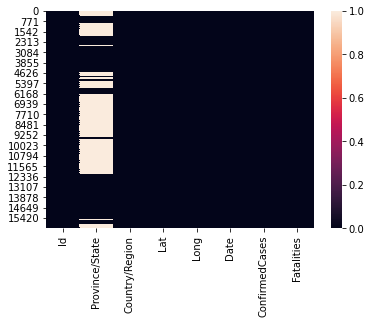

In [69]:
sns.heatmap(train_df.isnull())

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16188 entries, 0 to 16187
Data columns (total 8 columns):
Id                16188 non-null int64
Province/State    7410 non-null object
Country/Region    16188 non-null object
Lat               16188 non-null float64
Long              16188 non-null float64
Date              16188 non-null object
ConfirmedCases    16188 non-null float64
Fatalities        16188 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1011.9+ KB


In [0]:
def fillNullProvince(x):
  coordinates = (x['Lat'],x['Long'])
  result =  rg.search(coordinates)
  return result[0].get('name')

In [82]:
train_df['Province/State'] = train_df.apply(lambda x:fillNullProvince(x) if pd.isnull(x['Province/State']) else x['Province/State'] ,axis=1)
train_df['Province/State'].value_counts()

Mweka                 114
Grand Princess        114
Diamond Princess      114
Arizona                57
Andorra la Vella       57
                     ... 
Corcuera               57
Gitarama               57
Topes de Collantes     57
Guadeloupe             57
Pailles                57
Name: Province/State, Length: 281, dtype: int64

In [83]:
train_df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,Kajran,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,Kajran,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,Kajran,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,Kajran,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,Kajran,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0
